## <center>Clustering Assignment2(Crime)</center>

#### Problem Statement:
<code style="background:lightblue;color:black">To Build a Clustering Model for Hierarchical,Kmeans and DBScan for the Crime data to identify the clusters and to draw the inferences from the clusters obtained.</code>

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the respective csv file and having a glance at it
crime_data = pd.read_csv("crime_data.csv")
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Making necessary EDA for the model

In [3]:
#Checking the rows and columns of the data
crime_data.shape

(50, 5)

In [4]:
#Renaming the unnamed column for space avoidance.
crime_data.rename(columns={"Unnamed: 0":"States"},inplace=True)
crime_data.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
#checking for the datatype and if any nulls values present in the dataset
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
#checking for the duplicate values if present any
crime_data[crime_data.duplicated(keep= False)]

,States,Murder,Assault,UrbanPop,Rape


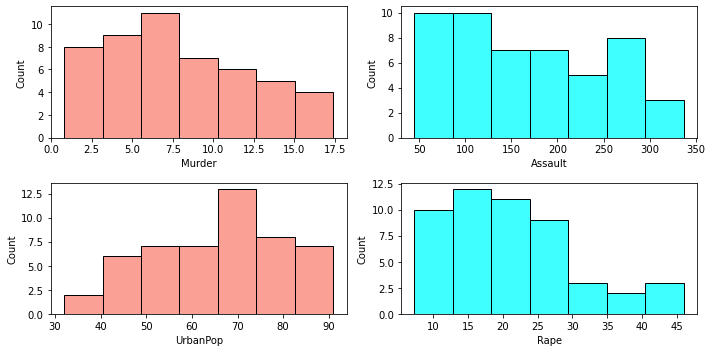

In [7]:
#checking for the outliers in the dataset using the plots
fig, ax = plt.subplots(2, 2, figsize=(10,5))

sns.histplot(crime_data.Murder, ax=ax[0,0],color='salmon',edgecolor='black')
sns.histplot(crime_data.Assault, ax=ax[0,1],color='cyan',edgecolor='black')
sns.histplot(crime_data.UrbanPop, ax=ax[1,0],color='salmon',edgecolor='black')
sns.histplot(crime_data.Rape, ax=ax[1,1],color='cyan',edgecolor='black')

plt.tight_layout()
plt.show()

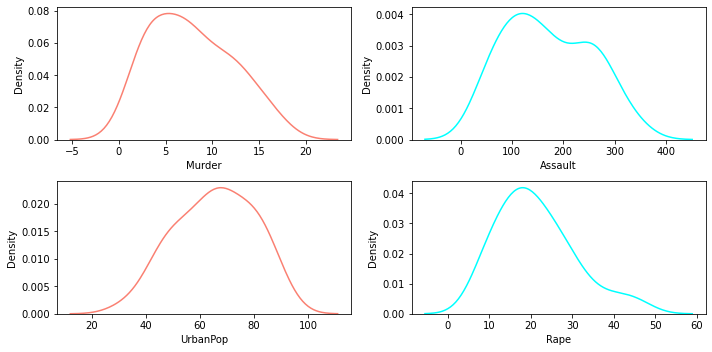

In [8]:
#checking if our data follows normal distribution or not
fig, ax = plt.subplots(2, 2, figsize=(10,5))

sns.kdeplot(crime_data.Murder, ax=ax[0,0],color='salmon')
sns.kdeplot(crime_data.Assault, ax=ax[0,1],color='cyan')
sns.kdeplot(crime_data.UrbanPop, ax=ax[1,0],color='salmon')
sns.kdeplot(crime_data.Rape, ax=ax[1,1],color='cyan')

plt.tight_layout()
plt.show()

In [9]:
#Normalizing the data
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [10]:
#Having a glance at the normalized data
norm_data = norm_func(crime_data.iloc[:,1:])
norm_data.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


### Performing Heirarchical Clustering 

#### Creating Single Linakge Method

Text(0.5, 1.0, ' Single Linkage Dendogram')

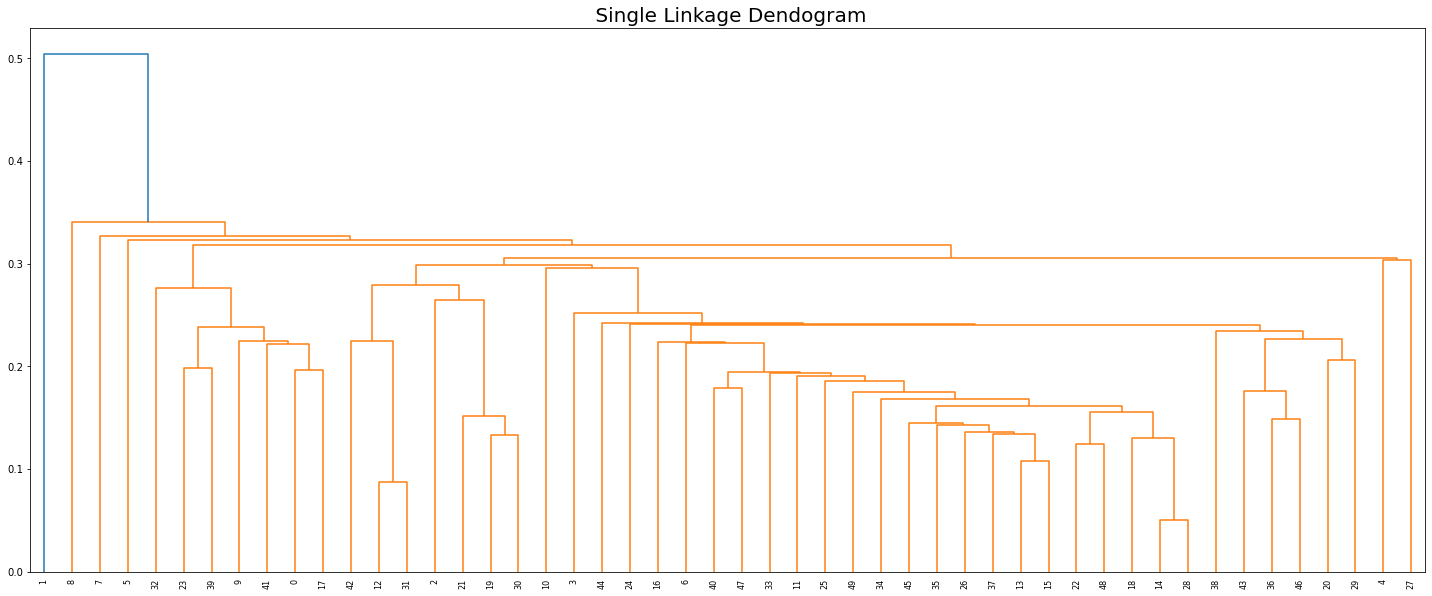

In [11]:
#Plotting the dendogram plot for the Single Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='single'))
plt.title(" Single Linkage Dendogram",size=20)

In [12]:
#Building single linkage model with two cluster 
HC1 = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'single')


In [13]:
#fitting the model on the data
y_hc1 = HC1.fit_predict(norm_data)


In [14]:
#Creating the cluster column for the built model
Clusters=pd.DataFrame(y_hc1,columns=['Clusters'])
crime_data['cluster'] = y_hc1

In [15]:
#Checking how many values fall under each of the clusters created
for i in range(2):
    print("cluster", i)
    print("Total Values:", len(list(crime_data[crime_data['cluster'] == i]['States'].values)))

cluster 0
Total Values: 49
cluster 1
Total Values: 1


#### Creating Complete Linkage Method

Text(0.5, 1.0, ' Complete Linkage Dendogram')

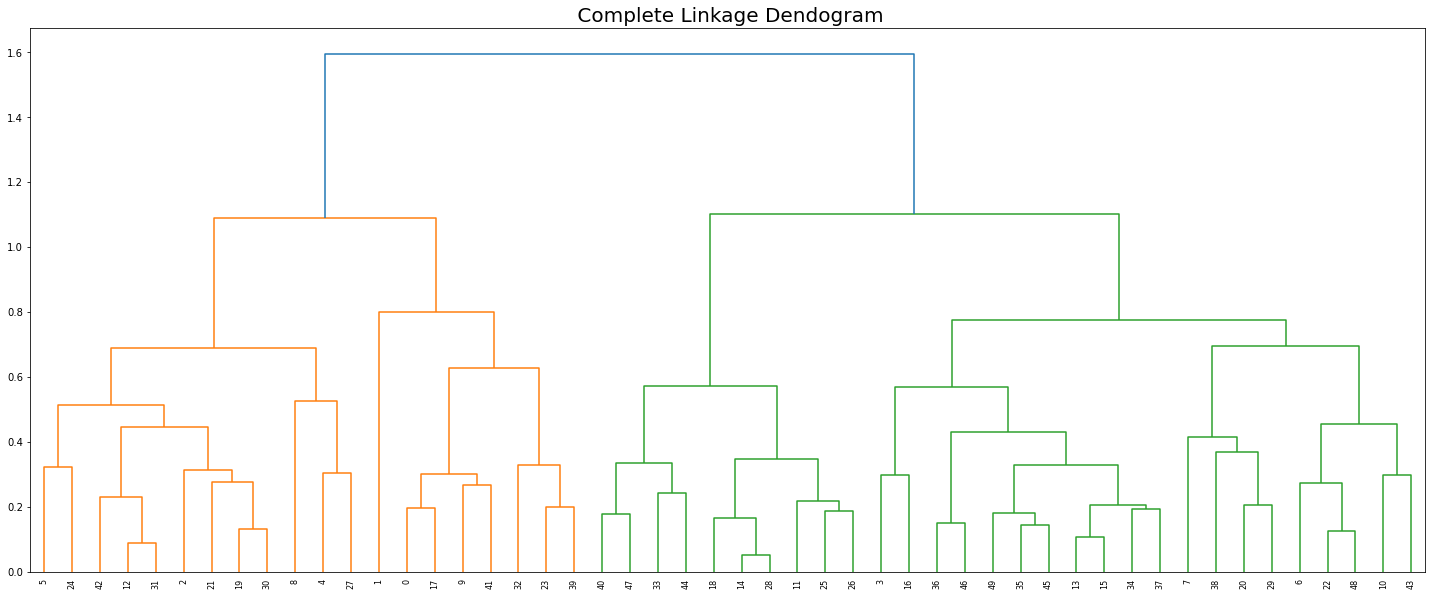

In [16]:
#Plotting the dendogram plot for the Complete Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='complete'))
plt.title(" Complete Linkage Dendogram",size=20)

In [17]:
#Building complete Linkage model
HC2 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [18]:
#fitting the model on the data
y_hc2 = HC2.fit_predict(norm_data)

In [19]:
#Creating the cluster column for the build model
Clusters=pd.DataFrame(y_hc2,columns=['Clusters'])
crime_data['cluster'] = y_hc2

In [20]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(crime_data[crime_data['cluster'] == i]['States'].values)))

cluster 0
Total Values: 8
cluster 1
Total Values: 20
cluster 2
Total Values: 10
cluster 3
Total Values: 12


#### Creating Average Linkage Method

Text(0.5, 1.0, ' Average Linkage Dendogram')

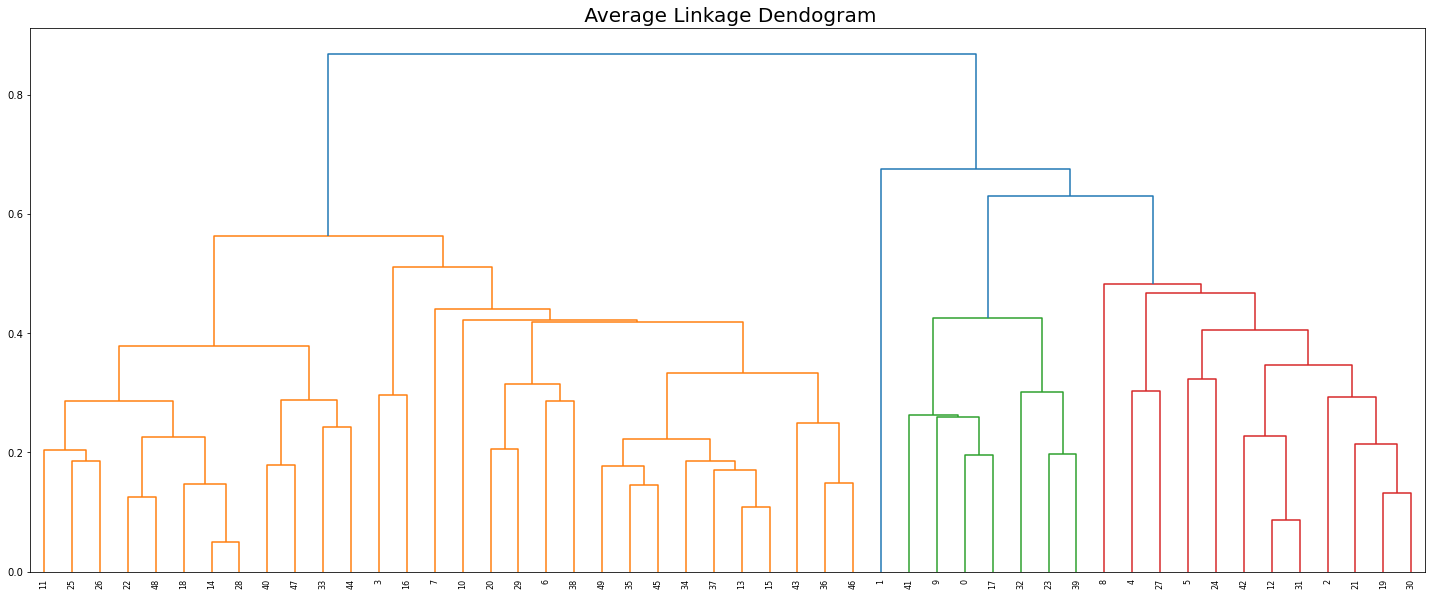

In [21]:
#Plotting the dendogram plot for the Average Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='average'))
plt.title(" Average Linkage Dendogram",size=20)

In [22]:
#Building the Average Linkage Model
HC3= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'average')

In [23]:
#fitting the model on the data
y_hc3 = HC3.fit_predict(norm_data)

In [24]:
#Creating the cluster column for the build model
Clusters=pd.DataFrame(y_hc3,columns=['Clusters'])
crime_data['cluster'] = y_hc3

In [25]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(crime_data[crime_data['cluster'] == i]['States'].values)))

cluster 0
Total Values: 30
cluster 1
Total Values: 12
cluster 2
Total Values: 1
cluster 3
Total Values: 7


#### Creating Centroid(Ward) Linkage Method

Text(0.5, 1.0, ' Centroid Linkage Dendogram')

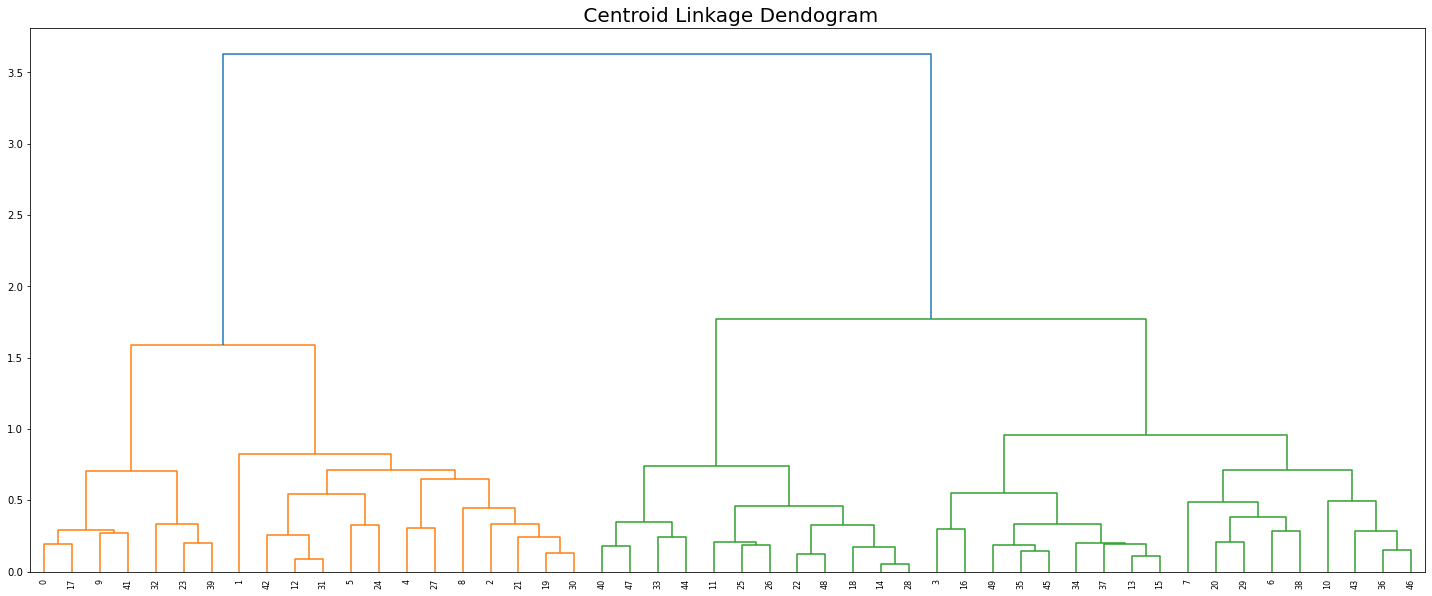

In [26]:
#Plotting the dendogram plot for Centroid Linkage Model
fig=plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(norm_data, method='ward'))
plt.title(" Centroid Linkage Dendogram",size=20)

In [27]:
#Building Centroid Linkage model
HC4= AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')

In [28]:
#fitting the model on the data
y_hc4 = HC4.fit_predict(norm_data)

In [29]:
#Creating the cluster column for the build model
Clusters=pd.DataFrame(y_hc4,columns=['Clusters'])
crime_data['cluster'] = y_hc4

In [30]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(crime_data[crime_data['cluster'] == i]['States'].values)))

cluster 0
Total Values: 18
cluster 1
Total Values: 13
cluster 2
Total Values: 12
cluster 3
Total Values: 7


#### Creating K-means Clustering

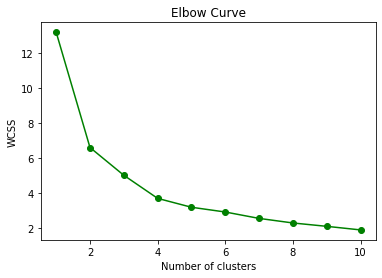

In [31]:
#Plotting an elbow curve to check for k value
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss,'bo-',color='g')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

>From the above Elbow curve we can say that we got k=4 that is 4 clusters

In [32]:
#Building K-means Clustering model and fitting the data into it
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(norm_data)

KMeans(n_clusters=4, random_state=42)

In [33]:
#Creating labels and then creating new column to put into our dataset
KM_label=clusters_new.labels_
crime_data['cluster'] = clusters_new.labels_

In [34]:
#Checking how many values fall under each of the clusters created
for i in range(4):
    print("cluster", i)
    print("Total Values:", len(list(crime_data[crime_data['cluster'] == i]['States'].values)))

cluster 0
Total Values: 17
cluster 1
Total Values: 8
cluster 2
Total Values: 13
cluster 3
Total Values: 12


#### Creating DBSCAN Clustering

In [35]:
#Creating a DBSCAN model with eps=0.3 and sample of 3
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(norm_data)

DBSCAN(eps=0.3, min_samples=3)

In [36]:
#Looking into cluster column
dbscan.labels_
cl=pd.DataFrame(dbscan.labels_,columns=['cluster_db'])
cl.head()

,cluster_db
0,0
1,-1
2,1
3,1
4,-1


In [37]:
crime_data['clust_db_scan']=cl.cluster_db

### Evaluating Clustering methods with the help of Silhouette Score 
>The Silhouette Score metric calculates the goodness of the clustering techniques and it ranges from -1 to 1.<br>
1: Means clusters are well apart from each other and clearly distinguised.<br>
0:Means the distance between clusters is not significant<br>
-1:Means clusters are assigned in the wrong way

In [38]:
#Silhouette Score of Single Linkage Method
silhou_SLM=(metrics.silhouette_score(norm_data,y_hc1))
silhou_SLM

0.21033337025958487

In [39]:
#Silhouette Score of Complete Linkage Method
silhou_ComLM=(metrics.silhouette_score(norm_data,y_hc2))
silhou_ComLM

0.30607294424263076

In [40]:
#Silhouette Score of Average Linkage Method
silhou_ALM=(metrics.silhouette_score(norm_data,y_hc3))
silhou_ALM

0.36992391140277175

In [41]:
#Silhouette Score of Centroid(ward) Linkage Method
silhou_CenLM=(metrics.silhouette_score(norm_data,y_hc4))
silhou_CenLM

0.3298707379986785

In [42]:
#Silhouette Score of Kmeans Clustering
Silhou_Kmeans=(metrics.silhouette_score(norm_data,clusters_new.labels_))
Silhou_Kmeans

0.3408903560074363

In [43]:
#Silhouette Score of DBSCAN Clustering
Silhou_DBSCAN=(metrics.silhouette_score(norm_data,cl.cluster_db))
Silhou_DBSCAN

0.24738588099272632

In [44]:
#Listing into the table
Table={'Clustering_Models':['HC_Single_linkage','HC_Complete_Linkage','HC_Average_Linakge','HC_Centroid_Linkage','KMeans','DBSCAN'],
  'Silhouette score':[silhou_SLM,silhou_ComLM,silhou_ALM,silhou_CenLM,Silhou_Kmeans,Silhou_DBSCAN]
  }
Table=pd.DataFrame(Table)
Table

,Clustering_Models,Silhouette score
0,HC_Single_linkage,0.210333
1,HC_Complete_Linkage,0.306073
2,HC_Average_Linakge,0.369924
3,HC_Centroid_Linkage,0.329871
4,KMeans,0.340890
5,DBSCAN,0.247386


#### Insights drawn:
>From the table above its evident that different types of hierarchical clustering is way more complex to understand and in them only the Average linkage is giving a kind of better result compared to other heirarchical clustering.Here of all the clustering methods Kmeans Clustering also provides the better result with the cluster number of 4.